# LDA Based Amazon Investment Model

Question: If a press release can influence Amazon's stock price, can press releases that generate daily outperformance be identified, isolated and tracked for seasonality? If so, can the seasonality of outperforming press releases be used to decide when to buy and sell?

### Web Scraping

All packages and programs used to answer this question are held in the AmazonPrPatterns.py

In [1]:
import AmazonPrPatterns

The first step is to scrape all press releases over a given timeframe. Amazon press releases are held at https://press.aboutamazon.com/press-releases and can be scraped without limitation.

AmazonPrPatterns.PrReScrape() can be used to initiate the scrape. The only required arguments are the beginning year and end year for the timeframe requested. For demonstration purposes, we want all press releases between January 1st, 2011 and December 31, 2020, giving us 10 years of data. As a result, '(2011, 2020)' is passed through the function.

The function will result as a dataframe held in whatever variable we use. For this demonstration, we will call the dataframe containing all the scraped information 'scrape' so that it can be manipulated later.

Please note that about 1900 press releases need to be scraped. As a result, the scraping process may take between a half hour and an hour.

In [2]:
scrape = AmazonPrPatterns.PrReScrape(2011, 2020)

/Users/gavin/Documents/Metis/Coursework/Project_5_github/AmazonPrPatterns.py:33: UserWarning: URLs compiled. Operation could take between 30 and 60 minutes to complete scrape
  warnings.warn('URLs compiled. Operation could take between 30 and 60 minutes to complete scrape')


Headlines Compiled
250 press releases have been processed. Processing ongoing...
500 press releases have been processed. Processing ongoing...
750 press releases have been processed. Processing ongoing...
1000 press releases have been processed. Processing ongoing...
1250 press releases have been processed. Processing ongoing...
1500 press releases have been processed. Processing ongoing...
1750 press releases have been processed. Processing ongoing...


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


Press release content and release time compiled


/Users/gavin/Documents/Metis/Coursework/Project_5_github/AmazonPrPatterns.py:117: UserWarning: Dataframe compiled. Datframe can be accesses by calling "PrReScrape.dataframe" or by calling "PrReScrape.getdata()".
  warnings.warn('Dataframe compiled. Datframe can be accesses by calling "PrReScrape.dataframe" or by calling "PrReScrape.getdata()".')


Once loaded as a variable, the dataframe can be viewed by calling 'scrape.dataframe'

In [3]:
scrape.dataframe

,date,headline,link,time,content,time_adj
0,2011-12-30,Amazon.com Announces “Best of 2011” Lists,/news-releases/news-release-details/amazoncom-...,9:00 AM,None,9.0
1,2011-12-29,2011 is the Best Holiday Ever for Kindle,/news-releases/news-release-details/2011-best-...,9:00 AM,None,9.0
2,2011-12-22,It’s the Most Digital Time of the Year: Amazon...,/news-releases/news-release-details/its-most-d...,9:01 AM,None,9.0
3,2011-12-22,"Governor McDonnell, Amazon.com Announce Compan...",/news-releases/news-release-details/governor-m...,8:30 AM,None,9.0
4,2011-12-22,Governor Haslam and Amazon Announce Amazon Wil...,/news-releases/news-release-details/governor-h...,8:30 AM,None,9.0
...,...,...,...,...,...,...
1954,2020-01-30,Amazon.com Announces Fourth Quarter Sales up 2...,/news-releases/news-release-details/amazoncom-...,4:01 PM,None,9.0
1955,2020-01-23,Amazon Donates $2 Million to Seattle-Based Non...,/news-releases/news-release-details/amazon-don...,2:14 PM,None,9.0
1956,2020-01-16,Amazon.com to Webcast Fourth Quarter 2019 Fina...,/news-releases/news-release-details/amazoncom-...,4:01 PM,None,9.0
1957,2020-01-13,Bundesliga Goes All-In on AWS to Revolutionize...,/news-releases/news-release-details/bundesliga...,7:00 AM,None,9.0


### Text Processing

Once the scrape is complete, the text needs to be pre-processed before an LDA analysis can begin. This can be done through the scrape.textprocess() function written into the .py file. The first argument for scrape.textprocess() is a name for the csv file that will hold the final, cleaned dataframe. 

Our webscraper captured both the headlines and body (which the program calls 'content') of each press release. The body of each press release requires significant cleaning, as some spaces are missing between words. Given the allotted timeframe (2.5 weeks) to take the project from end-to-end, only headline processing is currently available as the body processing is not yet available. However, an option to continue building out a cleaning mechanism for the press release body has been established for further development. If completed, the 'ContentOrHeadline' argument would take either 'headline' (as it does now) to begin processing the headline text, or 'content' to begin processing the text held in the body of each press release.

In [4]:
scrape.textprocess('processed_text', ContentOrHeadline = 'headline')

,date,headline,link,time,content,time_adj,headline_text,lemma_headline,pos_headline,label_headline,cleaned
0,2011-12-30,Amazon.com Announces “Best of 2011” Lists,/news-releases/news-release-details/amazoncom-...,9:00 AM,None,9.0,amazon com announces best of lists,"[amazon, com, announce, , good, of, , list]","[PROPN, PROPN, VERB, SPACE, ADJ, ADP, SPACE, N...",[ORG],"[amazon, com, announce, good, list]"
1,2011-12-29,2011 is the Best Holiday Ever for Kindle,/news-releases/news-release-details/2011-best-...,9:00 AM,None,9.0,is the best holiday ever for kindle,"[ , be, the, good, holiday, ever, for, kindle]","[SPACE, AUX, DET, ADJ, NOUN, ADV, ADP, NOUN]",[],"[good, holiday, kindle]"
2,2011-12-22,It’s the Most Digital Time of the Year: Amazon...,/news-releases/news-release-details/its-most-d...,9:01 AM,None,9.0,it’s the most digital time of the year amazon...,"[-PRON-, ’, the, most, digital, time, of, the,...","[PRON, VERB, DET, ADV, ADJ, NOUN, ADP, DET, NO...","[DATE, ORG]","[’, digital, time, year, amazon, announce, dig..."
3,2011-12-22,"Governor McDonnell, Amazon.com Announce Compan...",/news-releases/news-release-details/governor-m...,8:30 AM,None,9.0,governor mcdonnell amazon com announce compan...,"[governor, mcdonnell, , amazon, com, announce...","[PROPN, PROPN, SPACE, PROPN, PROPN, NOUN, PROP...","[ORG, ORG, CARDINAL, GPE]","[governor, mcdonnell, amazon, com, announce, c..."
4,2011-12-22,Governor Haslam and Amazon Announce Amazon Wil...,/news-releases/news-release-details/governor-h...,8:30 AM,None,9.0,governor haslam and amazon announce amazon wil...,"[governor, haslam, and, amazon, announce, amaz...","[PROPN, PROPN, CCONJ, PROPN, PROPN, PROPN, VER...","[ORG, ORG, PERSON, CARDINAL, GPE]","[governor, haslam, amazon, announce, amazon, w..."
...,...,...,...,...,...,...,...,...,...,...,...
1954,2020-01-30,Amazon.com Announces Fourth Quarter Sales up 2...,/news-releases/news-release-details/amazoncom-...,4:01 PM,None,9.0,amazon com announces fourth quarter sales up ...,"[amazon, com, announce, fourth, quarter, sale,...","[PROPN, PROPN, NOUN, ADJ, NOUN, NOUN, ADP, SPA...","[ORG, DATE]","[amazon, com, announce, fourth, quarter, sale]"
1955,2020-01-23,Amazon Donates $2 Million to Seattle-Based Non...,/news-releases/news-release-details/amazon-don...,2:14 PM,None,9.0,amazon donates million to seattle based non...,"[amazon, donates, , million, to, seattle, b...","[PROPN, PROPN, SPACE, NUM, PART, PROPN, VERB, ...","[ORG, CARDINAL, GPE, CARDINAL, GPE]","[amazon, donates, seattle, base, nonprofit, ex..."
1956,2020-01-16,Amazon.com to Webcast Fourth Quarter 2019 Fina...,/news-releases/news-release-details/amazoncom-...,4:01 PM,None,9.0,amazon com to webcast fourth quarter financi...,"[amazon, com, to, webcast, fourth, quarter, ...","[PROPN, PROPN, PART, VERB, ADJ, NOUN, SPACE, A...","[ORG, DATE]","[amazon, com, webcast, fourth, quarter, financ..."
1957,2020-01-13,Bundesliga Goes All-In on AWS to Revolutionize...,/news-releases/news-release-details/bundesliga...,7:00 AM,None,9.0,bundesliga goes all in on aws to revolutionize...,"[bundesliga, go, all, in, on, aws, to, revolut...","[PROPN, VERB, ADV, ADV, ADP, PROPN, PART, VERB...",[ORG],"[bundesliga, go, aws, revolutionize, football,..."


### LDA Analysis for Topic Assessment

The AmazonPrPatterns.LdaOutperformance() function is used to establish topics through a Latent Dirichlet Allocation analysis for a given time period. 

The function also finds the most efficient number of groups by conducting a grid-search-like mechanism. The LDA analysis takes in each number between a defined range (in this case 1 and 40) as its number of topic groups. The function then finds the number of topic groups (or the 'group number') that best isolates outperforming press releases. If more than 65% of press releases in a single topic within a group number are associated with an outperforming day, then the topic itself is considered outperforming. The function will then add up all press releases held in the outperforming topics for a single group number, and automatically use the group number that captures the most outperforming press releases. Please note that the 65% threshold can be adjusted, as well as the group number the user would like to use.

The function also automatically scrapes daily pricing information for the targeted stock (in this case AMZN, our first parameter) and a benchmark (the Dow Jones Industrial Average) from Yahoo Finance and saves the resulting dataframes as csv files which can be accessed later. The startdate and enddate parameters should reflect the timespan over which the user wants to capture information from Yahoo Finance. 

In [5]:
lda = AmazonPrPatterns.LdaOutperformance('AMZN', 'lda_outperform', 1, 40, 'processed_text', startdate = '2012-01-01', enddate = '2020-12-21', stop_words = [])

### Facebook Prophet for Seasonality

The final step to testing for seasonality and establishing buy and sell indicators is to run the lda.prophet_run() function. Please note that there are several adjustable parameters, but adjustemnts are not required. The function will show which topic numbers are showing signs of outperformance and provide a list of the words that are most indicative of each topic. By matching the topic numbers that outperform (held in the first list) to the list of words, comparisons and inferences can be conducted by the user. 

The analysis establishes all activity prior to and including December 31, 2017 as the "training set" and all activity after this date as the "test set". The test set will be used to measure the results from running the algorithm on our training set. The date at which the training/test split occurs can be adjusted within the function's parameters.

After the LDA analysis, several graphs are shown that can be used to provide further context to the now established buy and sell dates. On each chart, the black line represents the likelihood that a press release from an outperforming topic will occur. More explanation for each chart is provided in the following paragraphs:

1. **Facebook Prophet Output:** The graph is the normal output for the Facebook Prophet package. The black dots represent the daily two week rolling sum for all press releases in outperforming topics in the training data. The vertical green lines represent the dates at which press releases from outperforming topics occur.

2. **Test Set Prediction:** The graph shows the predicted likelihood that a press release that would fall into an outperforming topic would occur. The zones of purple show where the value of the prediction is above the 50th percentile. This is the parameter set by default as the threshold for buying and selling. Therefore, the beginning of a purple band would act as a buy indicator, and the end of a purple band would act as a sell indicator.

3. **Buy and Sell Indicators Over Pricing:** The graph shows the times at which a user would expect to hold the stock, laid over the value of one share of Amazon (NYSE: AMZN). The movement within the purple bands illustrates the change in price during the hold period.

4. **Test Set:** The graph shows Facebook Prophet's predictive values for the test set (2018-2020).

5. **Training Set:** The graph shows Facebook Prophet's line of best fit established on the training set.

6. **Training and Test Continuity:** The graph illustrates the continuous line created by combining the training and test sets, seperated by the vertical green line at the division point (December 31, 2017 - January 1, 2018).

7. **Training Set Predictive Value Accuracy:** The graph shows Facebook Prophet's 'line of best fit', which illustrates its best guess at creating a seasonality pattern, mapped against the actual dates in which relevant press releases occured. In theory, the distance between the green lines should be smallest where Facebook Prophet's predicted value is highest. It is easiest to view this chart in terms of visual density rather than measuring one line to the next, and can be used as a visual check on the accuracy of the 'line of best fit'.

8. **Predictive Value Over One Year:** The graph illustrates the predictive value over the final year of the training set.

[6, 13, 18, 19]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Topic  0
center, fulfillment, sale, job, create, quarter, time, open, business, second, plan, small, fourth, expand, medium

Topic  1
kindle, price, store, india, benefit, member, minute, market, mexico, food, low, available, launches, release, retail

Topic  2
general, availability, alexa, echo, stick, service, deal, web, day, holiday, seasonal, hire, elastic, record, network

Topic  3
kindle, paperwhite, country, available, live, video, debuts, access, action, come, personalize, story, macie, touch, world

Topic  4
student, school, computer, science, high, acquire, music, college, connect, community, engineer, title, unlimited, future, benefit

Topic  5
accelerate, range, high, dynamic, transformation, history, august, salesforce, strategic, global, game, month, member, announces, modernize

Topic  6
win, globe, award, golden, multi, membership, available, league, celebration, partnership, kindle, football, free, hbo, battery

Topic  7
result, conference, financial, webcast, quarter

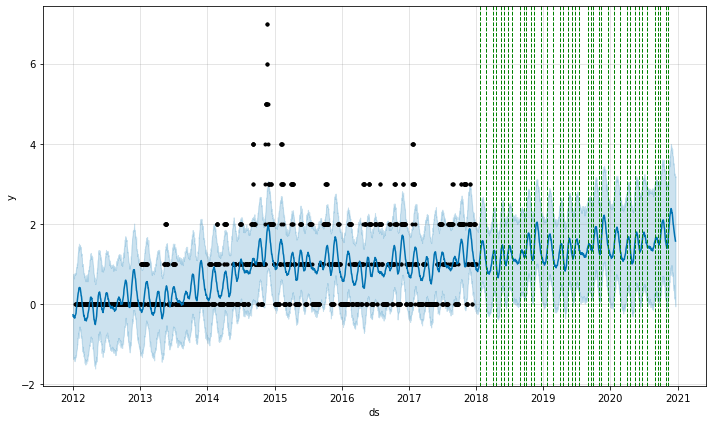

(42, 5)


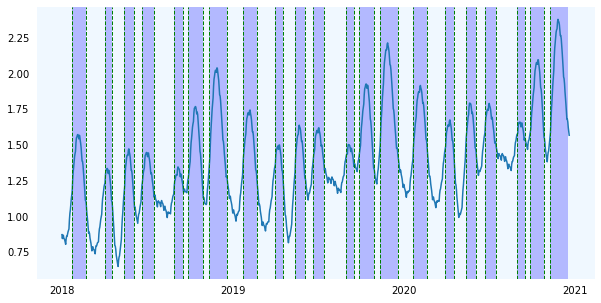

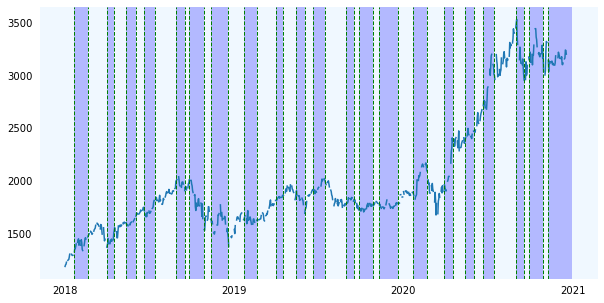

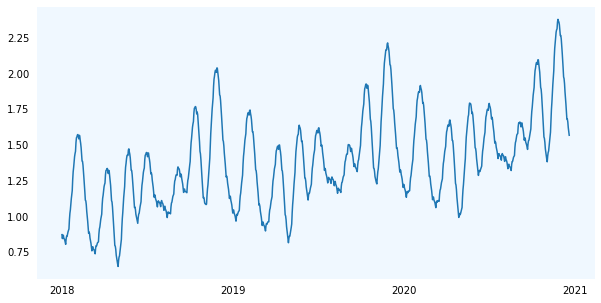

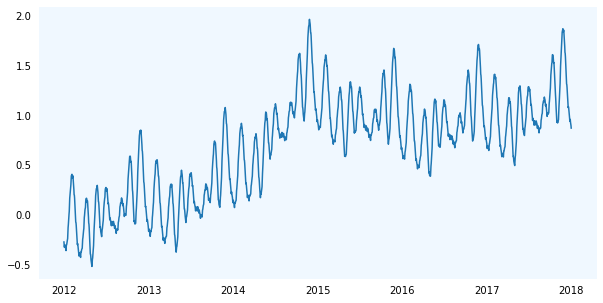

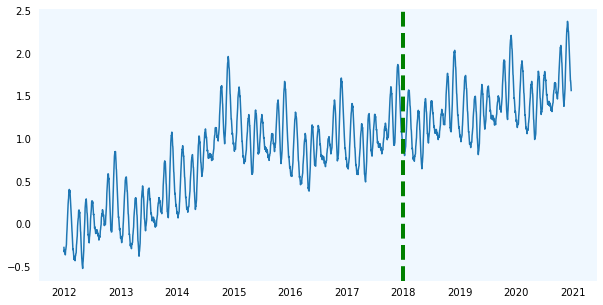

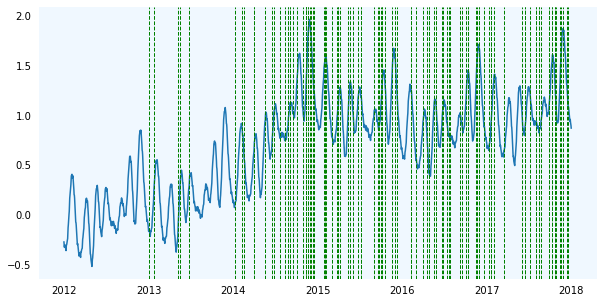

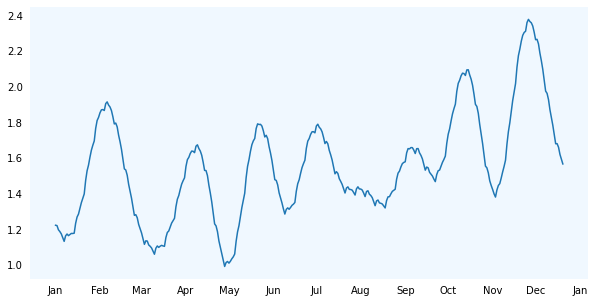

In [6]:
lda.prophet_run()

### Measuring Results

AmazonPrPatterns also contains an IRR calculator that measures the return if the user were to buy and sell on the algorithm's reccomended days over the test set. The user can pass through a start_date and an end_date to the amzn_irr() function to view the IRR over a specified period. Below are examples for the test set.

**2018**

In [7]:
AmazonPrPatterns.amzn_irr(start_date = '2018-01-01', end_date = '2018-12-31')

-0.6645285977444221

**2019**

In [8]:
AmazonPrPatterns.amzn_irr(start_date = '2019-01-01', end_date = '2019-12-31')

0.03476992331350459

**2020**

In [12]:
AmazonPrPatterns.amzn_irr(start_date = '2020-01-01', end_date = '2020-12-21')

0.6844863826026693

**2018-2020**

In [13]:
AmazonPrPatterns.amzn_irr(start_date = '2018-01-01', end_date = '2020-12-21')

0.1063997584087939